# WeatherPy

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
#Store the base url
url = 'https://api.openweathermap.org/data/2.5/weather'

#List to hold the response data
response_list = []

#Variable to store the number of cities processed successfully
cities_processed = 0
#Variable to store the number of cities skipped during processing
cities_skipped = 0

#Iterate through the list of cities
for city in cities:
    
    #Attempt to retrieve city data
    try:
        #Build the query url
        query_url = f'{url}?q={city}&appid={weather_api_key}&units=imperial'
        
        #Print a message to show the city being processed
        print(f"Processing data for city {cities.index(city) + 1}: {city}.")
        
        #Make API request
        response = requests.get(query_url).json()

        #Create a dictionary of the desired data from the response
        response_dict = {'City': city.title(),
                         'Cloudiness': response['clouds']['all'],
                         'Country': response['sys']['country'],
                         'Date': response['dt'],
                         'Humidity': response['main']['humidity'],
                         'Lat': response['coord']['lat'],
                         'Lng': response['coord']['lon'],
                         'Max Temp': response['main']['temp_max'],
                         'Wind Speed': response['wind']['speed']
                        }
        #Add the response dictionary to the list of response data
        response_list.append(response_dict)
        
        #Add 1 to the cities_processed counter
        cities_processed += 1
        
    #If the city is not found
    except:
        #Print a message and skip processing for this city
        print(f"City {cities.index(city) + 1} not found. Skipping...")
        
        #Add 1 to the cities_skipped counter
        cities_skipped += 1
        
#Print a message when data retrieval is complete
print(f'''
-------------------------------------------------
Data processing complete.
Cities processed successfully: {cities_processed} 
Cities skipped: {cities_skipped}
-------------------------------------------------
''')

Processing data for city 1: chatra.
Processing data for city 2: mataura.
Processing data for city 3: longyearbyen.
Processing data for city 4: champerico.
Processing data for city 5: taolanaro.
City 5 not found. Skipping...
Processing data for city 6: provideniya.
Processing data for city 7: qaanaaq.
Processing data for city 8: lalibela.
Processing data for city 9: corrales.
Processing data for city 10: ust-kamchatsk.
City 10 not found. Skipping...
Processing data for city 11: punta arenas.
Processing data for city 12: atuona.
Processing data for city 13: goure.
Processing data for city 14: rikitea.
Processing data for city 15: saint-philippe.
Processing data for city 16: chuy.
Processing data for city 17: tasiilaq.
Processing data for city 18: ribeira grande.
Processing data for city 19: attawapiskat.
City 19 not found. Skipping...
Processing data for city 20: pangnirtung.
Processing data for city 21: port lincoln.
Processing data for city 22: nanortalik.
Processing data for city 23: 

Processing data for city 190: black forest.
Processing data for city 191: kavieng.
Processing data for city 192: belushya guba.
City 192 not found. Skipping...
Processing data for city 193: baft.
Processing data for city 194: magdagachi.
Processing data for city 195: padang.
Processing data for city 196: itaituba.
Processing data for city 197: san luis.
Processing data for city 198: bengkulu.
Processing data for city 199: sulecin.
Processing data for city 200: narsaq.
Processing data for city 201: urucara.
Processing data for city 202: canandaigua.
Processing data for city 203: buala.
Processing data for city 204: haibowan.
City 204 not found. Skipping...
Processing data for city 205: key largo.
Processing data for city 206: victoria.
Processing data for city 207: prieska.
Processing data for city 208: isangel.
Processing data for city 209: barra do garcas.
Processing data for city 210: rungata.
City 210 not found. Skipping...
Processing data for city 211: natchitoches.
Processing data

Processing data for city 381: ukiah.
Processing data for city 382: coahuayana.
Processing data for city 383: pauini.
Processing data for city 384: pechora.
Processing data for city 385: kloulklubed.
Processing data for city 386: kenai.
Processing data for city 387: sterling.
Processing data for city 388: ndioum.
Processing data for city 389: poum.
Processing data for city 390: manzhouli.
Processing data for city 391: malatya.
Processing data for city 392: havre-saint-pierre.
Processing data for city 393: cividale del friuli.
Processing data for city 394: scalloway.
City 394 not found. Skipping...
Processing data for city 395: carambei.
Processing data for city 396: pouebo.
Processing data for city 397: chau doc.
Processing data for city 398: kushmurun.
Processing data for city 399: denpasar.
Processing data for city 400: kulhudhuffushi.
Processing data for city 401: morant bay.
Processing data for city 402: kodiak.
Processing data for city 403: delvada.
Processing data for city 404: be

Processing data for city 570: joniskis.
Processing data for city 571: saint-augustin.
Processing data for city 572: jingdezhen.
Processing data for city 573: tame.
Processing data for city 574: svetlyy.
Processing data for city 575: kapustin yar.
Processing data for city 576: nyagan.
Processing data for city 577: beringovskiy.
Processing data for city 578: ngunguru.
Processing data for city 579: kall.
Processing data for city 580: tonota.
Processing data for city 581: ishigaki.
Processing data for city 582: neiafu.
Processing data for city 583: kichera.
Processing data for city 584: jijiga.
Processing data for city 585: iquique.
Processing data for city 586: tessalit.
Processing data for city 587: anadyr.
Processing data for city 588: ibra.
Processing data for city 589: kjopsvik.
Processing data for city 590: wakkanai.
Processing data for city 591: zhangye.
Processing data for city 592: kiyasovo.
Processing data for city 593: tumannyy.
City 593 not found. Skipping...
Processing data fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
#Create a data frame of the retrieved city data
response_df = pd.DataFrame(response_list)

#Export the city data to a .csv file
response_df.to_csv(output_data_file, index=False)

#Display the data frame
response_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Chatra,0,IN,1586732317,73,24.22,84.87,75.20,3.22
1,Mataura,73,NZ,1586731493,81,-46.19,168.86,45.00,14.00
2,Longyearbyen,40,SJ,1586731995,70,78.22,15.64,-4.00,2.24
3,Champerico,49,GT,1586732328,65,14.30,-91.92,85.50,7.85
4,Provideniya,90,RU,1586731758,80,64.38,-173.30,30.20,11.18
...,...,...,...,...,...,...,...,...,...
537,Orlik,85,RU,1586732683,61,52.52,99.83,25.70,2.51
538,Daru,32,PG,1586732683,72,-9.08,143.21,84.24,8.63
539,Ouadda,97,CF,1586732684,39,8.08,22.40,69.55,1.03
540,Soyo,99,AO,1586732684,89,-6.13,12.37,77.16,7.65


In [43]:
#Verify the number of values per column
response_df.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

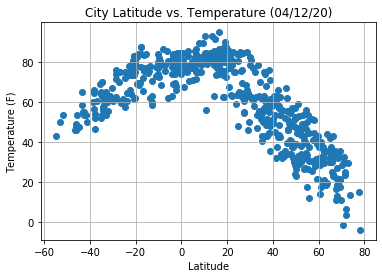

In [40]:
#Store the date of analysis
todays_date = date.today().strftime('%m/%d/%y')

#Create a scatter plot of latitude vs. temperature for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Max Temp']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Temperature ({todays_date})")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/images/lat_temp.png')

plt.show()

The above plot displays latitude vs.temperature for our randomly selected cities. There appears to be a trend of temperature increasing as we move closer to the equator (0 degrees latitude) and decreasing as we move farther away from the equator. 

#### Latitude vs. Humidity Plot

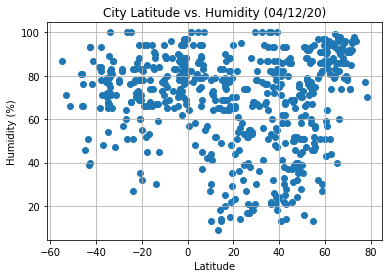

In [41]:
#Create a scatter plot of latitude vs. humidity for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Humidity']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Humidity ({todays_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/images/lat_hum.png')

plt.show()

The above plot displays latitude vs. humidity for our randomly selected cities. There does not seem to be a readily apparent trend in the relationsip between latitude and humidity. 

#### Latitude vs. Cloudiness Plot

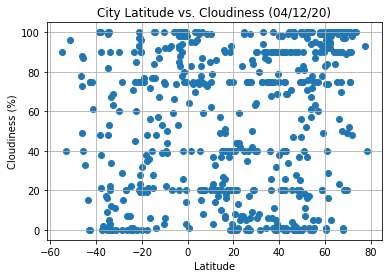

In [42]:
#Create a scatter plot of latitude vs. cloudiness for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Cloudiness']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Cloudiness ({todays_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/images/lat_cloud.png')

plt.show()

The above plot displays latitude vs. percent cloudiness for our randomly selected cities. There does not seem to be a readily apparent trend in the relationsip between latitude and cloudiness. 

#### Latitude vs. Wind Speed Plot

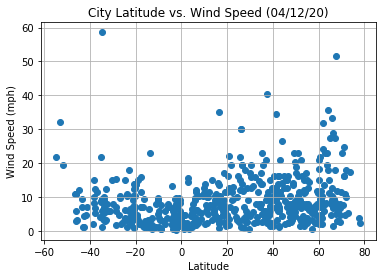

In [8]:
#Create a scatter plot of latitude vs. humidity for cities in the response data frame
x_values = response_df['Lat']
y_values = response_df['Wind Speed']
plt.scatter(x_values, y_values)

#Add plot titles/labels
plt.title(f"City Latitude vs. Wind Speed ({todays_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

#Export the scatter plot to a .png file
plt.savefig('output_data/images/lat_wind.png')

plt.show()

The above plot displays latitude vs. windspeed for our randomly selected cities. There does not seem to be a readily apparent trend in the relationsip between latitude and wind speed. 

## Linear Regression

In [9]:
# Create Northern and Southern Hemisphere DataFrames

#Northern hemisphere data frame
north_df = response_df.loc[response_df['Lat'] >= 0]

#Southern hemisphere data frame
south_df = response_df.loc[response_df['Lat'] < 0]

In [64]:
#Store the latitude values for the northern hemisphere
north_lat = north_df['Lat']

#Store the latitude values for the southern hemisphere
south_lat = south_df['Lat']

#Function to create calculate linear regression model and plot the model over a scatter plot
def lin_regress(x_vals, y_vals, x_lab, y_lab, hemisphere, xy):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    regress_values = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_vals, y_vals)
    plt.plot(x_vals, regress_values,"r-")
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.xlabel(f"{x_lab}")
    plt.ylabel(f"{y_lab}")
    plt.title(f"""Linear Regression for City {x_lab} vs. {y_lab}
    in the {hemisphere} Hemisphere ({todays_date})""")
    print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.893983386880733


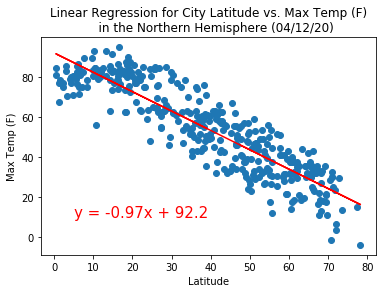

In [65]:
#Create a scatter plot and linear regression model for latitude vs. max temperature in the northern hemisphere
#Function parameters: x-values, y-values, x-label, y-label, hemisphere (Northern/Southern), line equation display position
lin_regress(north_lat, north_df['Max Temp'], 'Latitude', 'Max Temp (F)', 'Northern', (5, 10))

#Export the plot as a .png
plt.savefig('output_data/images/north_lat_temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7703425476233459


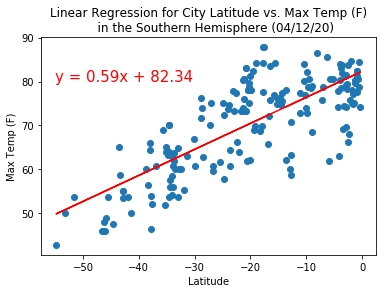

In [73]:
#Create a scatter plot and linear regression model for latitude vs. max temperature in the southern hemisphere
lin_regress(south_lat, south_df['Max Temp'], 'Latitude', 'Max Temp (F)', 'Southern', (-55, 80))

#Export the plot as a .png
plt.savefig('output_data/images/south_lat_temp.png')
plt.show()

The above two plots depict a linear regression model for the relationship between latitude and temperature for our randomly selected cities. The two plots are divided between the northern and southern hemispheres. These regression models support the trend we observed earlier where temperature increases as we move closer to the equator, and decreases as we move farther from the equator.

The r-squared values for our linear regression models also show a high goodness of fit for this data set with r-squared values of -0.89 and 0.77 for the northern and southern hemipsheres respectively. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22658788492203744


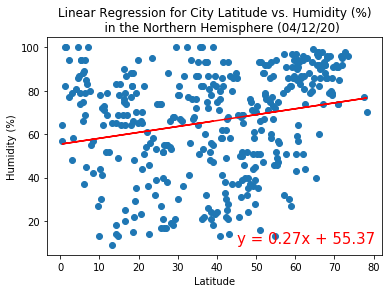

In [67]:
#Create a scatter plot and linear regression model for latitude vs. humidity in the northern hemisphere
lin_regress(north_lat, north_df['Humidity'], 'Latitude', 'Humidity (%)', 'Northern', (45, 10))

#Export the plot as a .png
plt.savefig('output_data/images/north_lat_hum.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1941975732024138


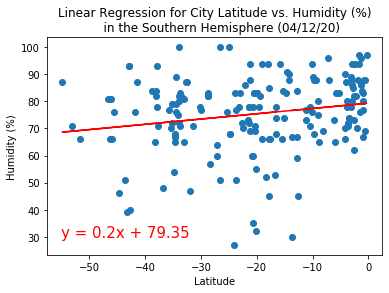

In [68]:
#Create a scatter plot and linear regression model for latitude vs. humidity in the southern hemisphere
lin_regress(south_lat, south_df['Humidity'], 'Latitude', 'Humidity (%)', 'Southern', (-55, 30))

#Export the plot as a .png
plt.savefig('output_data/images/south_lat_hum.png')
plt.show()

The above two plots depict a linear regression model for the relationship between latitude and percent humidity for our randomly selected cities. The two plots are divided between the northern and southern hemispheres. 

There does not seem to be a strong correlation between latitude and temperature and our linear regression model has a poor goodness of fit with r-squared values of 0.23 and 0.19 for the northern and souther hemispheres respectively. In this case, looking at latitude alone does a poor job of predicting the humidity of a city. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25201057294234314


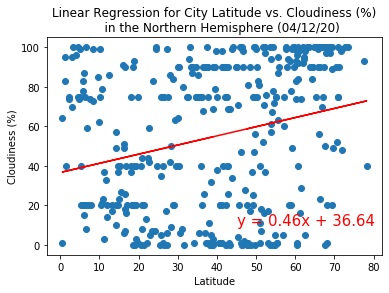

In [69]:
#Create a scatter plot and linear regression model for latitude vs. cloudiness in the northern hemisphere
lin_regress(north_lat, north_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Northern', (45, 10))

#Export the plot as a .png
plt.savefig('output_data/images/north_lat_cloud.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.28874120127005104


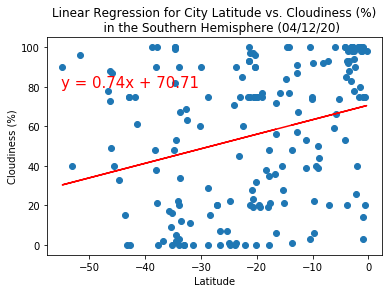

In [70]:
#Create a scatter plot and linear regression model for latitude vs. cloudiness in the southern hemisphere
lin_regress(south_lat, south_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Southern', (-55, 80))

#Export the plot as a .png
plt.savefig('output_data/images/south_lat_cloud.png')
plt.show()

The above two plots depict a linear regression model for the relationship between latitude and percent cloudiness for our randomly selected cities. The two plots are divided between the northern and southern hemispheres. 

There does not appear to be a strong correlation between latitude and cloudiness based on our results. From the r-squared values (0.25, and 0.29) for the northern and southern hemispheres respectively we can see that our linear regression model does a poor job of predicting cloudiness based on latitude alone. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1933392534416771


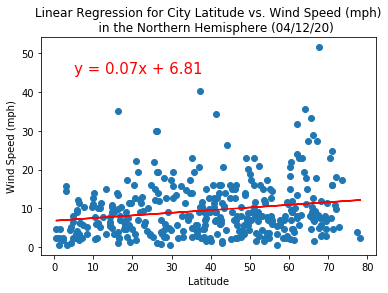

In [71]:
#Create a scatter plot and linear regression model for latitude vs. wind speed in the northern hemisphere
lin_regress(north_lat, north_df['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 'Northern', (5, 45))

#Export the plot as a .png
plt.savefig('output_data/images/north_lat_wind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3302547125649615


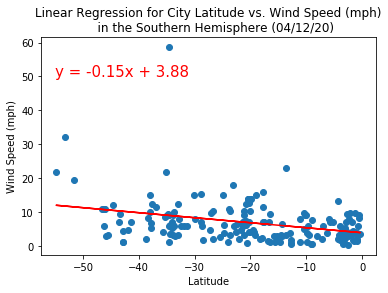

In [72]:
#Create a scatter plot and linear regression model for latitude vs. wind speed in the southern hemisphere
lin_regress(south_lat, south_df['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 'Southern', (-55, 50))

#Export the plot as a .png
plt.savefig('output_data/images/south_lat_wind.png')
plt.show()

The above two plots depict a linear regression model for the relationship between latitude and wind speed for our randomly selected cities. The two plots are divided between the northern and southern hemispheres.

Once again we see a very low level of correlation between wind speed and latitude. Our r-squared values of 0.19 and -0.33 for the northern and southern hemisphere respectively indicate the our model does a poor job of predicting wind speed based on latitude alone. 